In [7]:
import cv2
import numpy as np

# 讀取圖像
image = cv2.imread('photo4.jpg')
# 將圖像轉為灰度圖
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# 應用高斯模糊以減少噪聲
blur = cv2.GaussianBlur(gray, (5, 5), 0)
# 將 edges 轉換為 8 位無符號整數類型
edges = cv2.convertScaleAbs(edges)
# 使用自適應閾值處理突出紋路
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# 檢測邊緣
# 應用 Sobel 濾波器檢測邊緣
edges = cv2.Sobel(thresh, cv2.CV_64F, 1, 0, ksize=3)
# 轉換為 8 位無符號整數類型
edges = cv2.convertScaleAbs(edges)
# 使用霍夫變換檢測直線,找出紋路的線條
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)

# 計算間距
distances = []
if lines is not None:
    for i in range(len(lines)-1):
        # 提取直線的座標（x1, y1, x2, y2）
        x1, y1, x2, y2 = lines[i][0]
        x_next, y_next, _, _ = lines[i+1][0]
        # 計算相鄰直線的水平距離（x2 - x1）
        dist = abs(x_next - x2)
        # 統計這些距離的標準差：如果標準差小，間距較整齊；如果標準差大，間距不整齊
        distances.append(dist)

if distances:
    std_dev = np.std(distances)
    print(f"間距標準差: {std_dev}")
    # 設定一個閾值（例如標準差 < 10 像素）來判斷是否整齊
    if std_dev < 10:
        print("紋路間距整齊")
    else:
        print("紋路間距不整齊")
else:
    print("未檢測到足夠的直線")

# 顯示結果
cv2.imshow('Edges', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

間距標準差: 147.169479987455
紋路間距不整齊


In [ ]:
import cv2
import numpy as np

# 讀取圖像
image = cv2.imread('photo4.jpg')

# 檢查圖片是否成功讀取
if image is None:
    print("錯誤：無法讀取圖片 'photo4.jpg'，請檢查檔案路徑或檔案是否存在")
    exit()

# 將圖像轉為灰度圖
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# 應用高斯模糊以減少噪聲
blur = cv2.GaussianBlur(gray, (5, 5), 0)
# 使用自適應閾值處理突出紋路
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# 檢測邊緣
edges = cv2.Sobel(thresh, cv2.CV_64F, 1, 0, ksize=3)  # 檢測水平邊緣
edges = cv2.convertScaleAbs(edges)

# 使用霍夫變換檢測直線，專注於水平線
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)

# 創建結果圖，在原始圖上畫線
result = image.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        # 計算線的斜率，僅保留接近水平的線（斜率接近 0）
        if abs(y2 - y1) < abs(x2 - x1) * 0.1:  # 斜率小於 0.1 表示近似水平
            cv2.line(result, (x1, y1), (x2, y2), (0, 255, 0), 2)  # 畫綠色線條

# 計算間距（僅針對檢測到的水平線）
distances = []
if lines is not None:
    sorted_lines = sorted(lines, key=lambda x: x[0][1])  # 按 y 座標排序
    for i in range(len(sorted_lines)-1):
        x1, y1, x2, y2 = sorted_lines[i][0]
        x_next, y_next, _, _ = sorted_lines[i+1][0]
        # 僅計算垂直距離（y 方向的間距）
        dist = abs(y_next - y2)
        distances.append(dist)

if distances:
    std_dev = np.std(distances)
    print(f"間距標準差: {std_dev}")
    if std_dev < 10:
        print("紋路間距整齊")
    else:
        print("紋路間距不整齊")
else:
    print("未檢測到足夠的水平線")

# 顯示原始圖和結果
cv2.imshow('Original', image)
cv2.imshow('Result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

間距標準差: 86.19189747504673
紋路間距不整齊


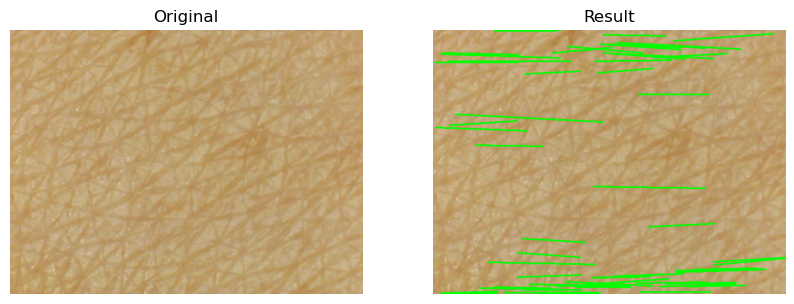

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 讀取圖像
image = cv2.imread('photo4.jpg')

# 檢查圖片是否成功讀取
if image is None:
    print("錯誤：無法讀取圖片 'photo4.jpg'，請檢查檔案路徑或檔案是否存在")
    exit()

# 將圖像轉為灰度圖
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# 應用高斯模糊以減少噪聲
blur = cv2.GaussianBlur(gray, (5, 5), 0)
# 使用自適應閾值處理突出紋路
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 2)

# 檢測邊緣
edges = cv2.Sobel(thresh, cv2.CV_64F, 1, 0, ksize=3)  # 檢測水平邊緣
edges = cv2.convertScaleAbs(edges)

# 使用霍夫變換檢測直線，專注於水平線
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)

# 創建結果圖，在原始圖上畫線
result = image.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        # 計算線的斜率，僅保留接近水平的線（斜率接近 0）
        if abs(y2 - y1) < abs(x2 - x1) * 0.1:  # 斜率小於 0.1 表示近似水平
            cv2.line(result, (x1, y1), (x2, y2), (0, 255, 0), 2)  # 畫綠色線條

# 計算間距（僅針對檢測到的水平線）
distances = []
if lines is not None:
    sorted_lines = sorted(lines, key=lambda x: x[0][1])  # 按 y 座標排序
    for i in range(len(sorted_lines)-1):
        x1, y1, x2, y2 = sorted_lines[i][0]
        x_next, y_next, _, _ = sorted_lines[i+1][0]
        # 僅計算垂直距離（y 方向的間距）
        dist = abs(y_next - y2)
        distances.append(dist)

if distances:
    std_dev = np.std(distances)
    print(f"間距標準差: {std_dev}")
    if std_dev < 10:
        print("紋路間距整齊")
    else:
        print("紋路間距不整齊")
else:
    print("未檢測到足夠的水平線")

# 使用 matplotlib 顯示圖片
plt.figure(figsize=(10, 5))

# 顯示原始圖
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

# 顯示結果圖
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Result')
plt.axis('off')

plt.show()

間距標準差: 137.48753206346376
紋路間距不整齊


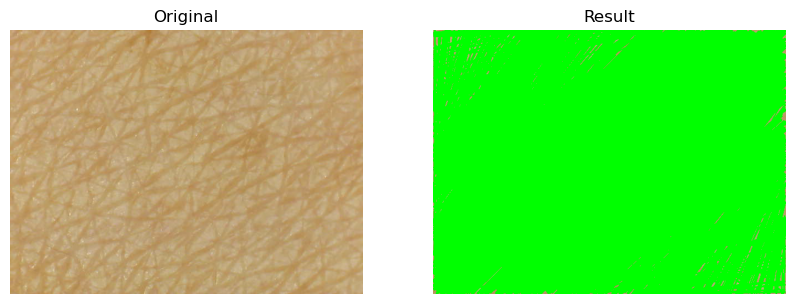

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 讀取圖像
image = cv2.imread('photo4.jpg')

# 檢查圖片是否成功讀取
if image is None:
    print("錯誤：無法讀取圖片 'photo4.jpg'，請檢查檔案路徑或檔案是否存在")
    exit()

# 將圖像轉為灰度圖
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# 應用高斯模糊以減少噪聲
blur = cv2.GaussianBlur(gray, (3, 3), 0)
# 使用自適應閾值處理突出紋路
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 5, 0)

# 檢測邊緣
edges = cv2.Sobel(thresh, cv2.CV_64F, 1, 0, ksize=3)  # 檢測水平邊緣
edges = cv2.convertScaleAbs(edges)

# 使用霍夫變換檢測直線，不限於水平線
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=30, minLineLength=20, maxLineGap=20)

# 創建結果圖，在原始圖上畫線
result = image.copy()
filtered_lines = []
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        # 計算線長
        length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        # 過濾過短的線條（可根據需求調整）
        if length > 20:
            filtered_lines.append(line)
            cv2.line(result, (x1, y1), (x2, y2), (0, 255, 0), 2)  # 畫綠色線條

# 計算間距（根據線條方向調整）
distances = []
if filtered_lines:
    # 按 y 座標排序（仍以 y 為基準，但允許斜線）
    sorted_lines = sorted(filtered_lines, key=lambda x: x[0][1])
    if len(sorted_lines) > 1:
        for i in range(len(sorted_lines)-1):
            x1, y1, x2, y2 = sorted_lines[i][0]
            x_next, y_next, _, _ = sorted_lines[i+1][0]
            # 計算 y 方向的距離（對於斜線，這是近似值）
            dist = abs(y_next - y2)
            distances.append(dist)

if distances:
    std_dev = np.std(distances)
    print(f"間距標準差: {std_dev}")
    if std_dev < 10:
        print("紋路間距整齊")
    else:
        print("紋路間距不整齊")
else:
    print("未檢測到足夠的直線")

# 使用 matplotlib 顯示圖片
plt.figure(figsize=(10, 5))

# 顯示原始圖
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

# 顯示結果圖
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Result')
plt.axis('off')

plt.show()